# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [ ]:
# loading data
data = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [ ]:
data.shape

(3454, 15)

### Displaying the first few rows of the dataset

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**Observations:**
The data contains the different attributes of used/refurbished phones and tablets from several brands with different properities.


### Checking the data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observations:**
- There are 11 numeric (float and int type) and 4 string (object type) columns in the data
- The target variable is the normalized_used_price, which is of float type

### Statistical summary of the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


**Observations:**
- The mean the normalized used price is 4.36 euro with 0.59 std, while the mean of the normalized new price is 5.23 euro with 0.68 std.
- The screen size is between 5.08 cm to 30.71 cm.
- The resulation of the main camera is 9.46mp on aveage and 6.55mp on average for the selfie camera.
- The devices relased between 2013 to 2020 and 50% of the devices have used for more than 690 days.
- The mean of the internal memory is 54.6 GB and for ram is about 4GB.
- The weight of the devices between 69 to 885 grams.
- The median of energy capacity of the device battery is 3000mAh.

### Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [ ]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in many columns.

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(10, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 4))
    else:
        plt.figure(figsize=(n + 2, 4))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

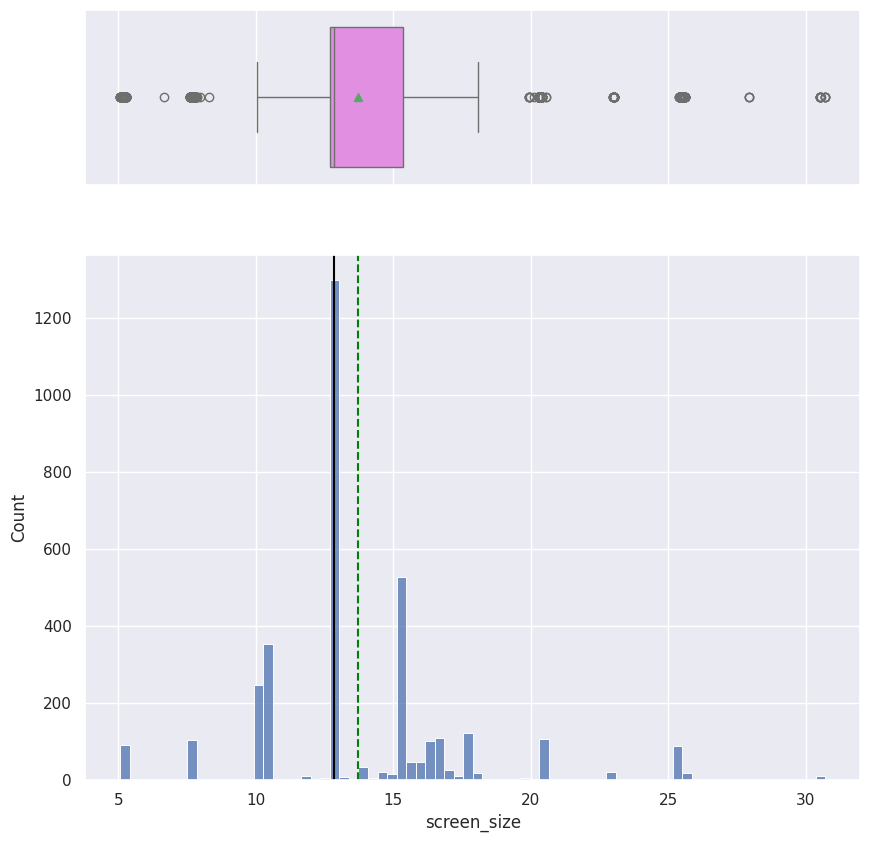

In [ ]:
histogram_boxplot(df, "screen_size")

**Observation:**
* The screen size distribution is skewed to the right since the mean is greater than the median.
* There are small and large outliers.


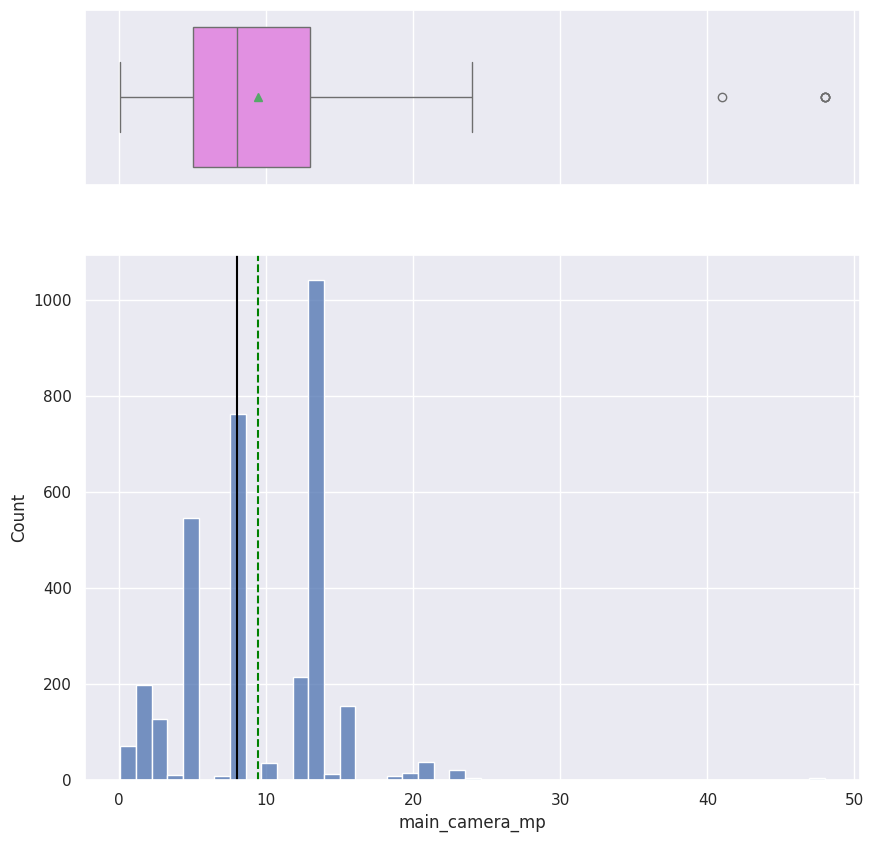

In [ ]:
histogram_boxplot(df, "main_camera_mp")

**Observation:**
- The main camera resolution: there are large outlier which cause the positively skewed distribution.

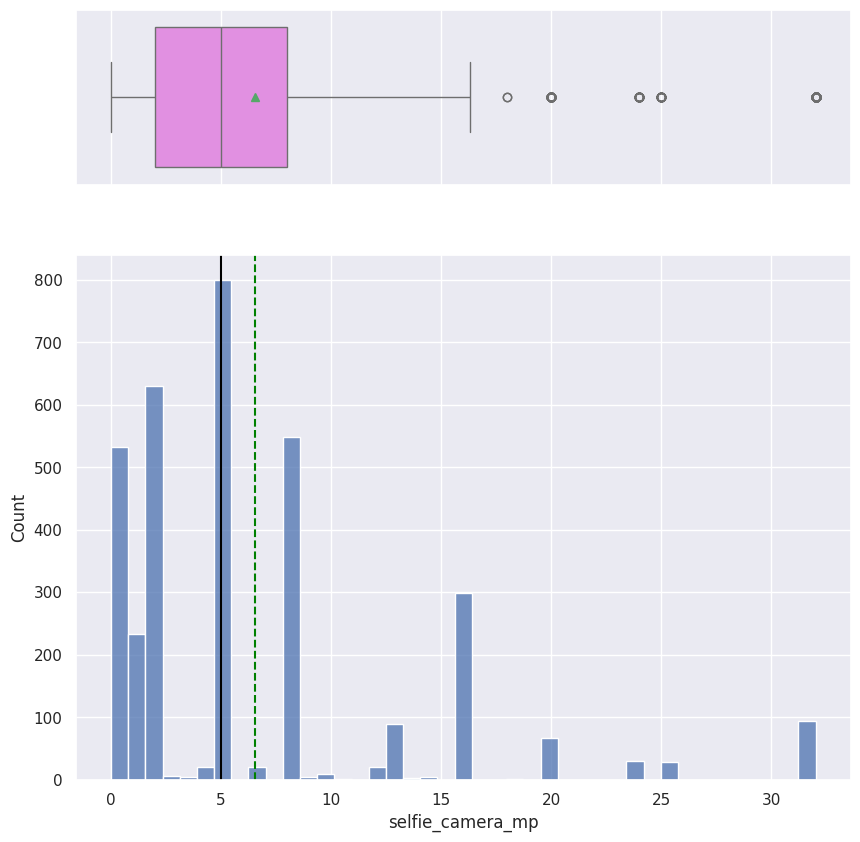

In [ ]:
histogram_boxplot(df, "selfie_camera_mp")

**Observation:**
- selfie camera resuliotion: There are large outliers which may caused the right skewed of the distribution.

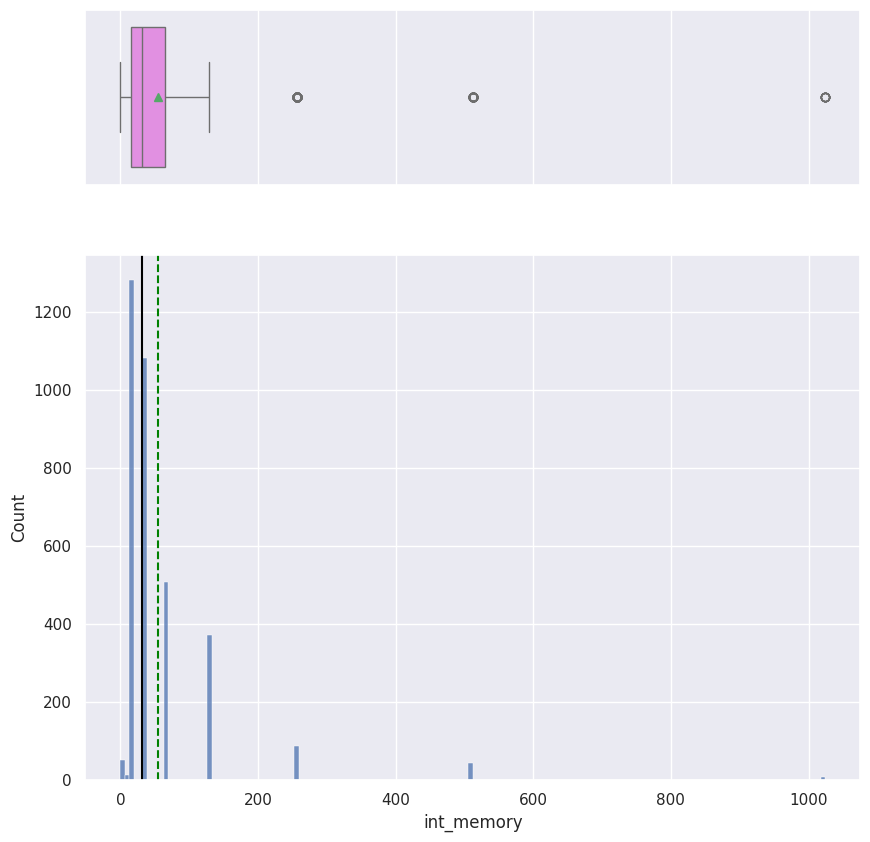

In [ ]:
histogram_boxplot(df, "int_memory")

**Observation:**
-  Amount of internal memory: There are large outliers which may caused the right skewed of the distribution.

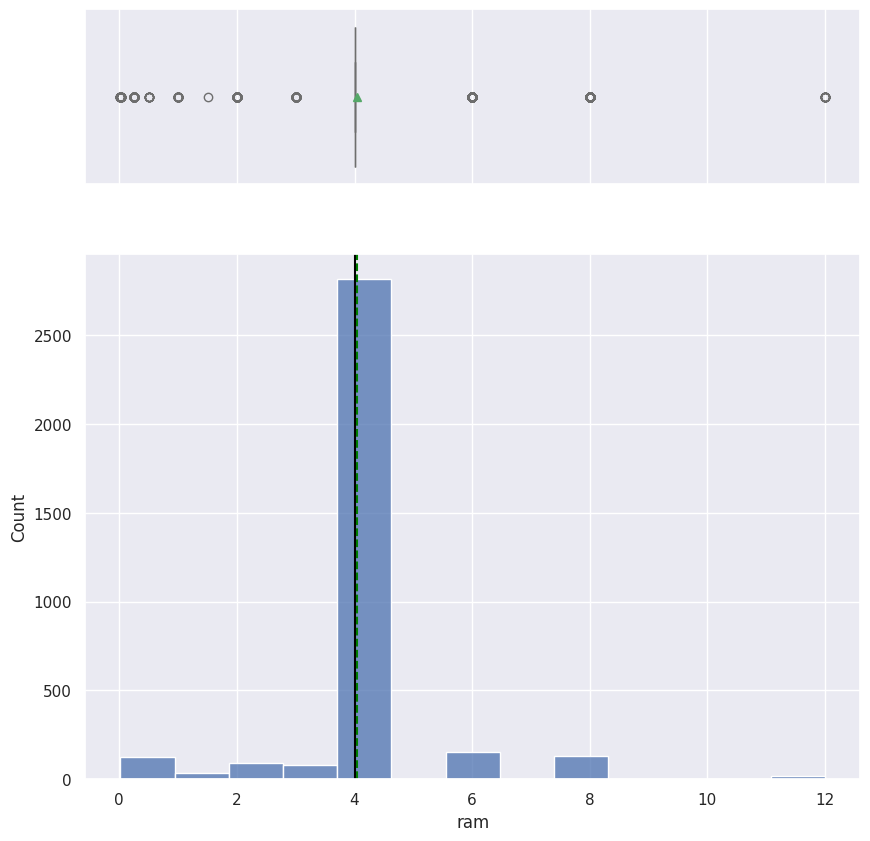

In [ ]:
histogram_boxplot(df, "ram")

 **Observation:**-
- Amount of RAM: the mean and the median are equal which may indicate the distribution is symmetric with outliers in both sides.



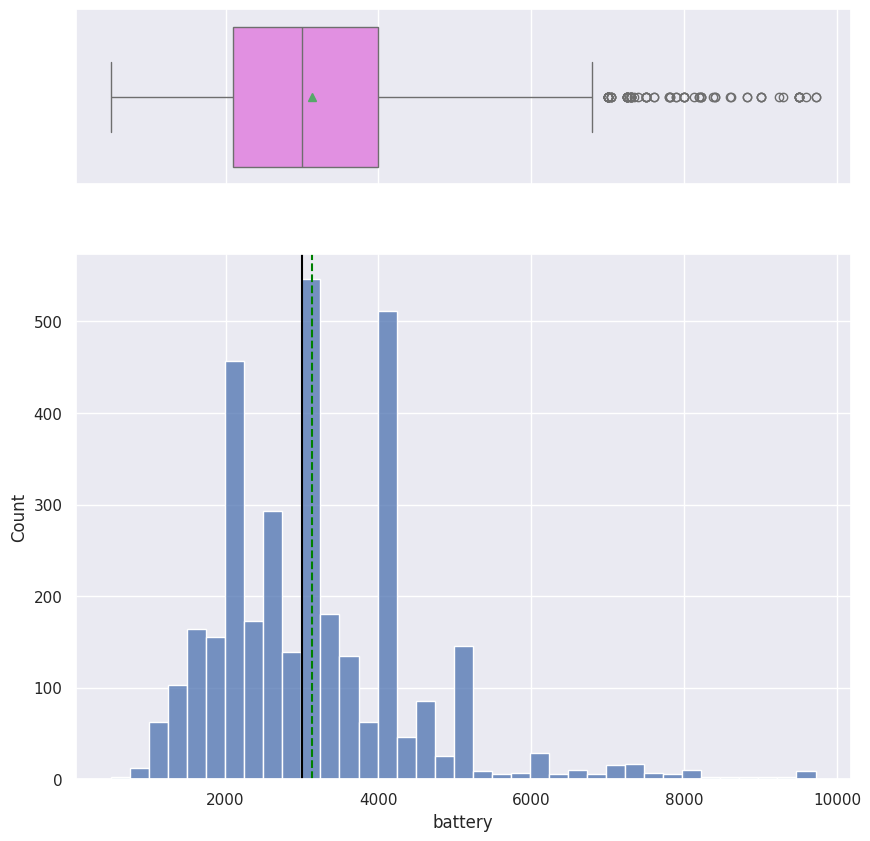

In [ ]:
histogram_boxplot(df, "battery")

**Observations:**
The energy capacity of the device battery distribution is skewed to the right since there are large outliers.

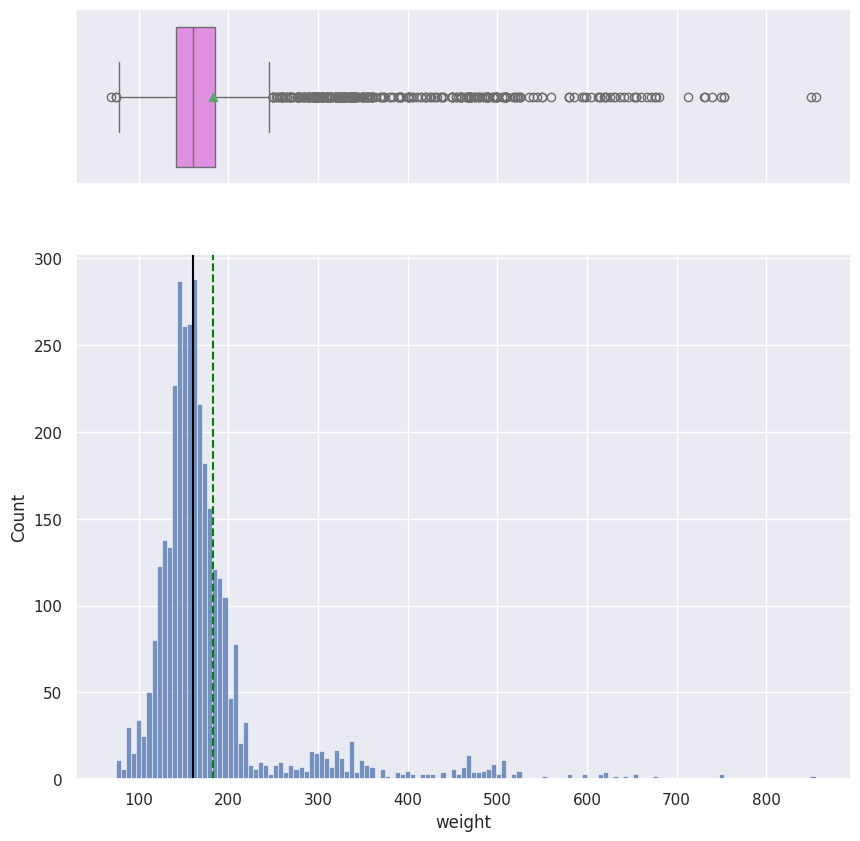

In [ ]:
histogram_boxplot(df, "weight")

**Observations:**
- The distribution of the weight of the devices is highly skewed to the right.

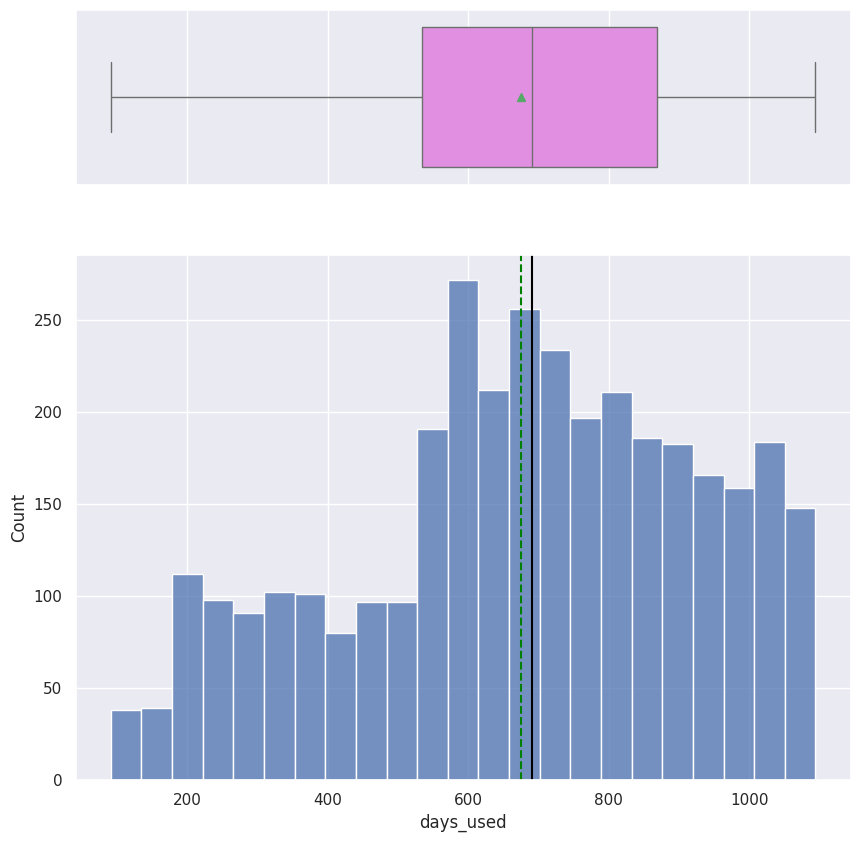

In [ ]:
histogram_boxplot(df, "days_used")

**Observations:**

- The distribution of the number of days used is highly skewed to the left with heavy tails.

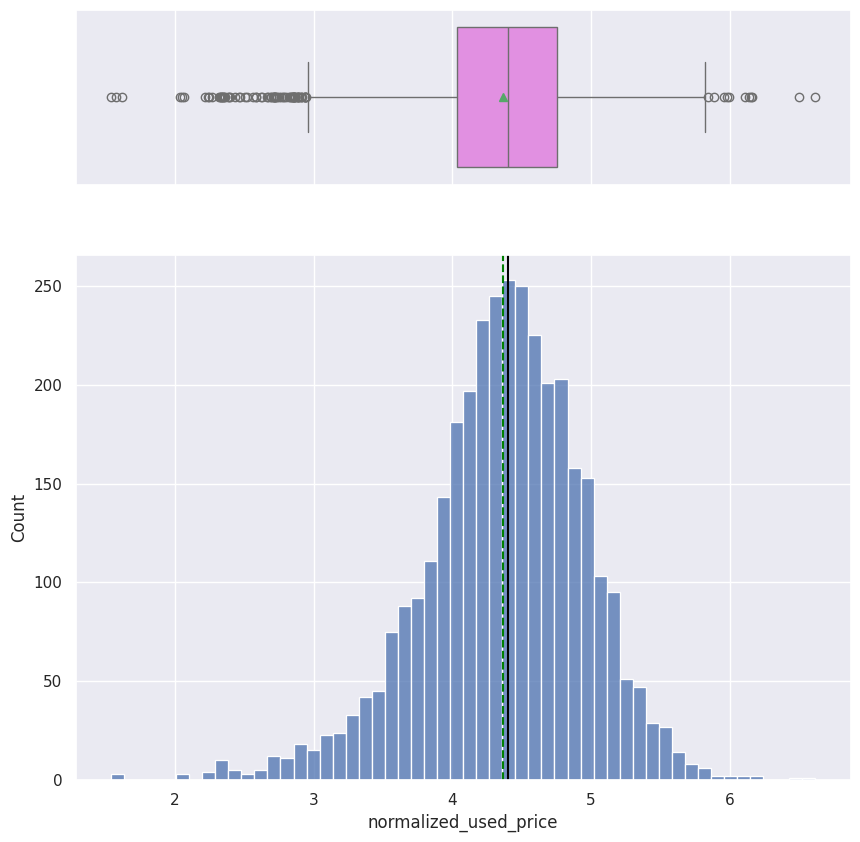

In [ ]:
histogram_boxplot(df, "normalized_used_price")

**Observations:**

The distribution of the normalized used price is approximatly Normal with outliers in both sides which may cause a very slight skewed to the left

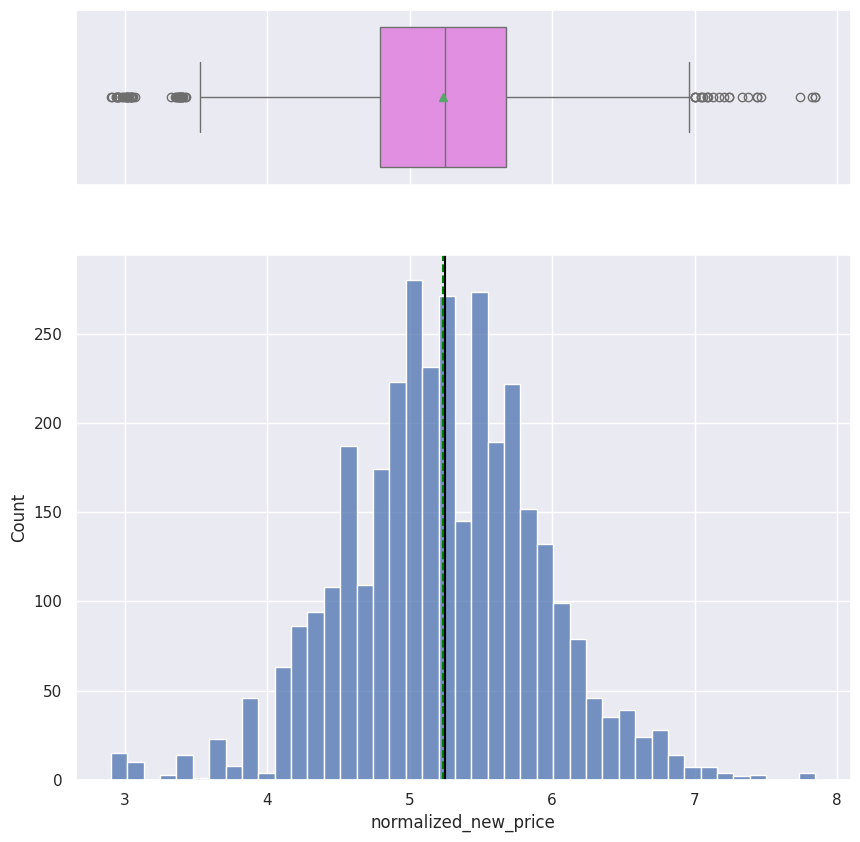

In [ ]:
histogram_boxplot(df, "normalized_new_price")

**Observations:**

The distribution of the normalized used price is symmetricwith outliers in both sides.

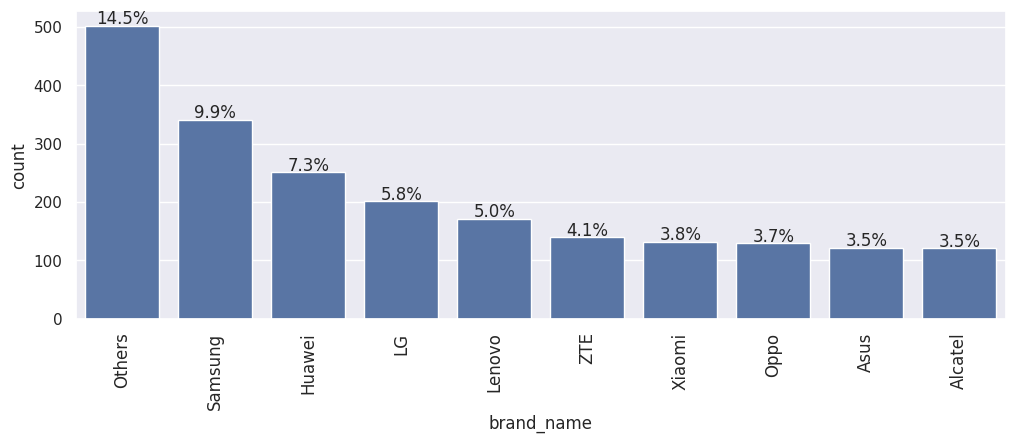

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10);

**Observation:**
- 90% of people preferred others type of devices the Samsung with about 10% and Huawei with 7%.
- The rest brands have similar precent from 5% to 3.5%.

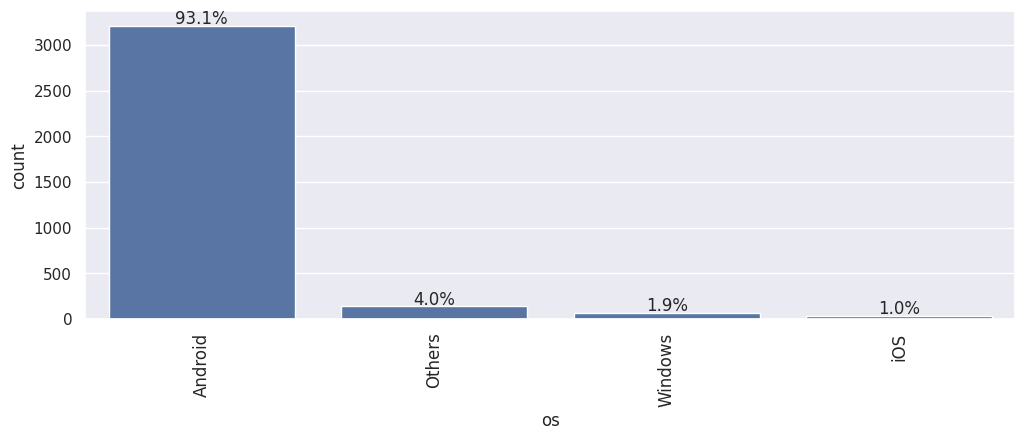

In [ ]:
labeled_barplot(df, "os", perc=True, n=10);

**Observation:**
- 93% of the devices runs Android os on them.

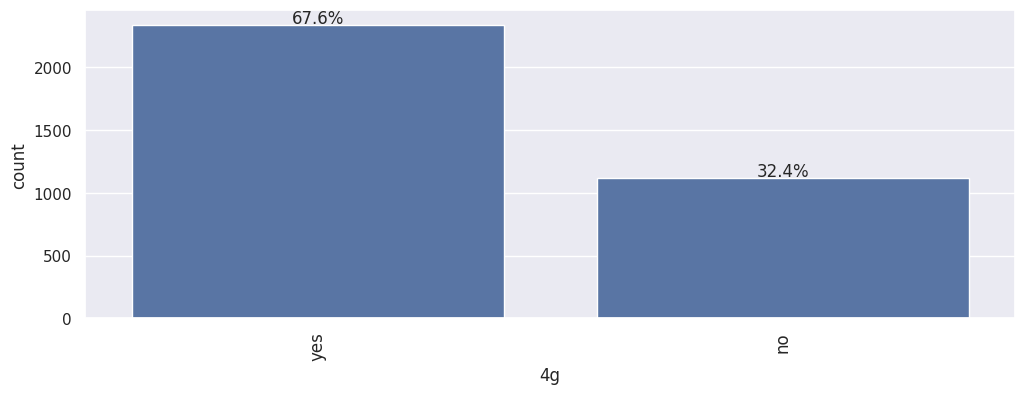

In [ ]:
labeled_barplot(df, "4g", perc=True, n=10)

**Observations:**
-  4G is available on almost 68% of the devices.

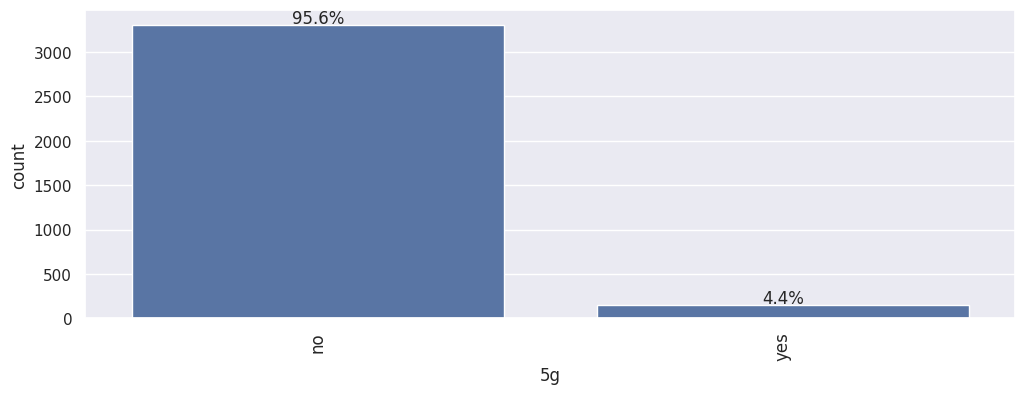

In [ ]:
labeled_barplot(df, "5g", perc=True,n=10)

**Observations:**
-  5G is available on almost 96% of the devices.

### Bivariate Analysis

In [ ]:
# Which attributes are highly correlated with the normalized price of a used device?
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping release year from list of numerical columns as they are not numerical in nature
num_cols.remove("release_year")

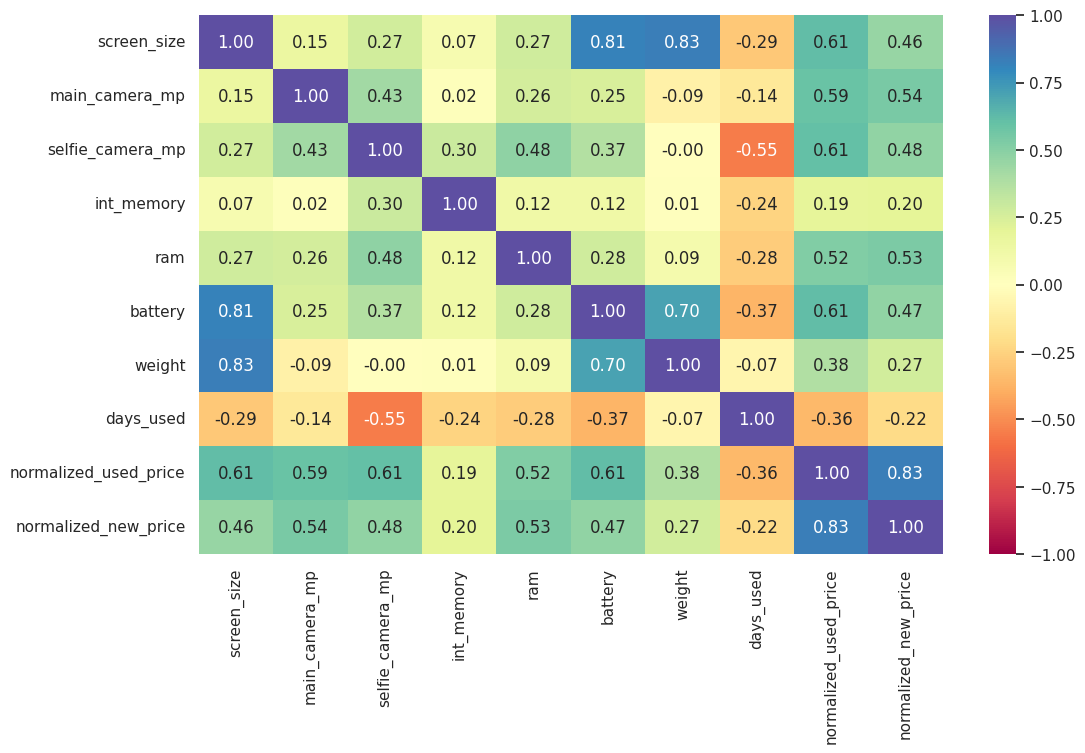

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
- There is a strong positive relationship between the normalized used price and (the normalized new price, battery, resolution of selfie camera, resolution of main camera, screen size).
- There is a moderate posive relationship between normalized used price and ram.
- There is a weak postive relationship between normalized used price and amount of internal memory (ROM).
- There is a weak negative relationship between normalized used price and ram.

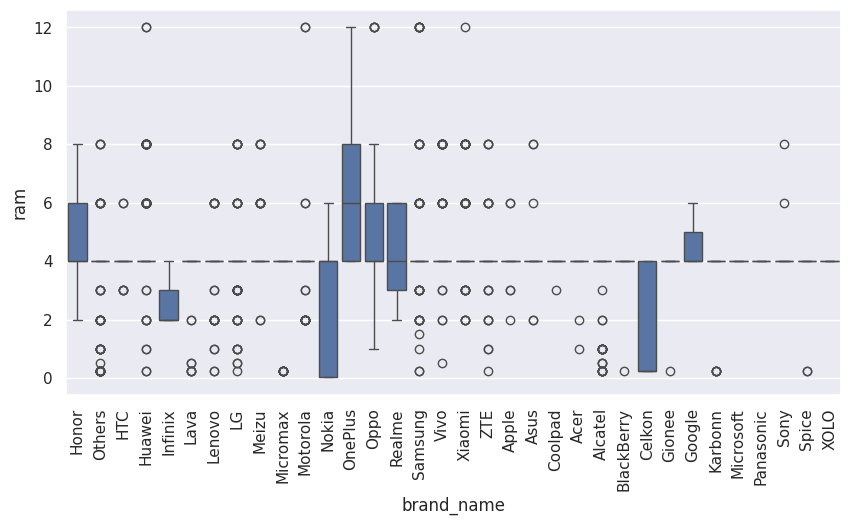

In [ ]:
# The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

The amount of RAM vary with the brands.
- The diferent brands have median 4GB.
- Nokia has the smallest amout of ram while OnePlus has the largest amount of ram about 12GB.


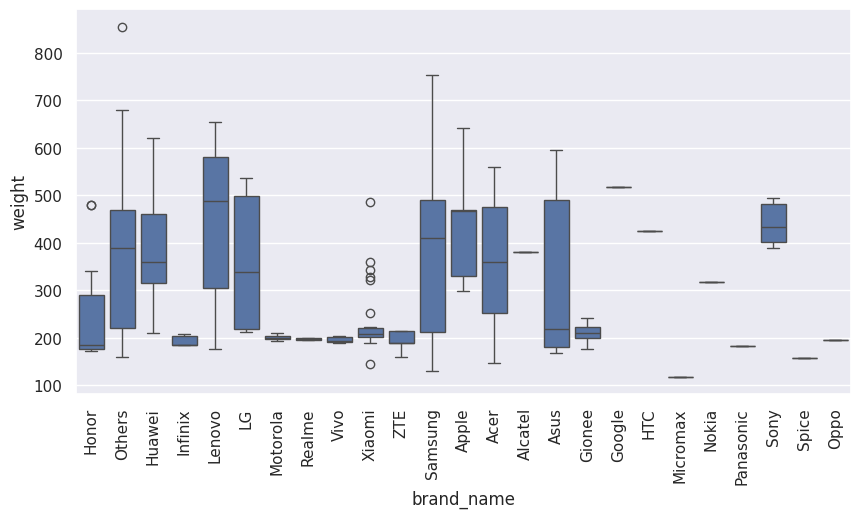

In [ ]:
# How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
large_battery = df[df.battery > 4500]
plt.figure(figsize=(10, 5))
sns.boxplot(data=large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

- The weight vary for phones and tablets offering large batteries
- Samsung weight is range from 120 to 750 grams with median about 410grams.
- Apple weight is range from 300 to 650 grams.
- some of the brands weight does not exceed 200 grams such as Infeinix, Motorola, Vivo.
- Some of the brands weight is less than 200 grams such as HTC, Spice.
- some others brand weight exceed 800 grams.

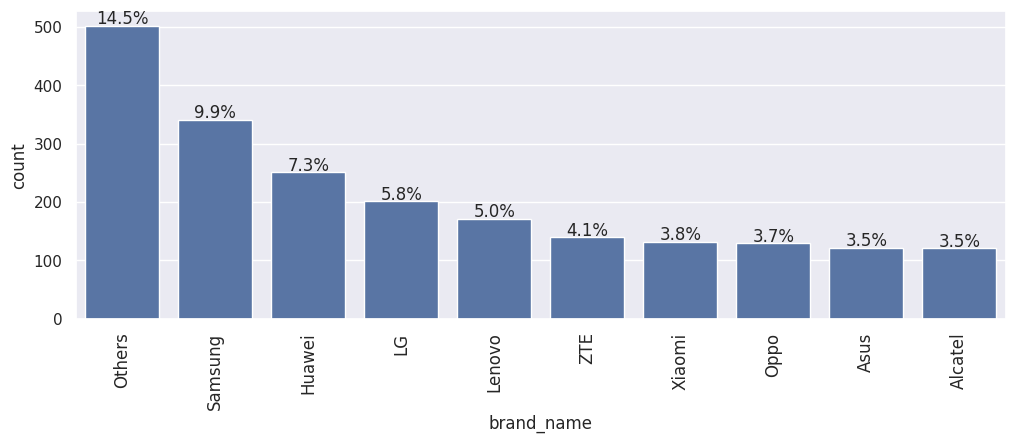

In [ ]:
# How many phones and tablets are available across different brands with a screen size larger than 6 inches?
large_screen = df[df.screen_size  > 15.24]
labeled_barplot(df, "brand_name", perc=True, n=10);

- About 14.5% of others brand has a scrren size larger than 6 inch.
- 10% of Samsung and 7% of Huawei has a screen size large than 6 inch.
- 6% -5% of LG and Lenovo has a screen size large than 6 inch.
- less than 5% of all the rest brands have a screen size large than 6 inch.

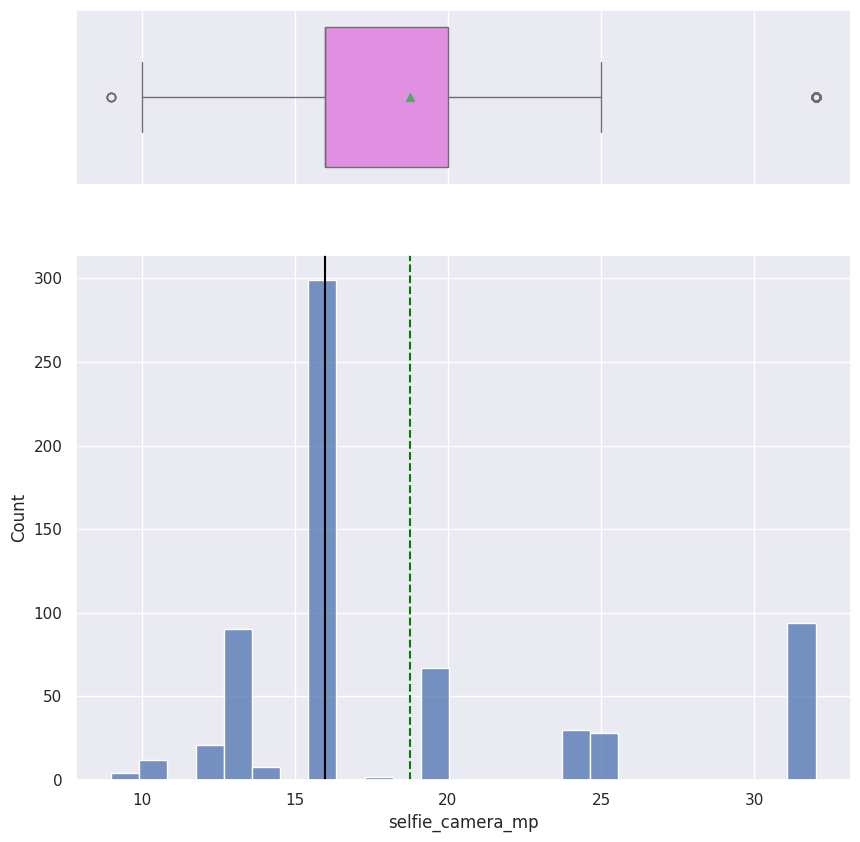

In [ ]:
# What is the distribution of devices offering greater than 8MP selfie cameras across brands?
selfie_camera = df[df.selfie_camera_mp > 8]
histogram_boxplot(selfie_camera, "selfie_camera_mp")

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
col_data = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']
for c in col_data:
  df1[c] = df1[c].fillna(value = df1.groupby(['brand_name','release_year'])[c].transform('median'))

df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- We impute the missing values in each column with the median grouped by `brand_name` and `release_year`.

In [ ]:
col_data = ['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight']
for c in col_data:
  df1[c] = df1[c].fillna(value = df1.groupby(['brand_name'])[c].transform('median'))

df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

- We impute the remaining missing values i
 with the median grouped by brand_name

In [ ]:
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(value = df1['main_camera_mp'].median())

df1.isnull().sum()


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

We will impute the remaining missing values in the `main_camera_mp` column with the median

### Feature Engineering

- It is a good idea to explore the data once again after manipulating it.

- Let's create a new years releasing by taking the difference between the current year 2024 and release year column.
- We will drop the original column once the new feature is created as the release year values themselves are not numerical in nature.

In [ ]:
df1["years_releasing"] = 2021 - df1["release_year"]
df1.drop(["release_year"], axis=1, inplace=True)
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_releasing
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


### Outlier Detection

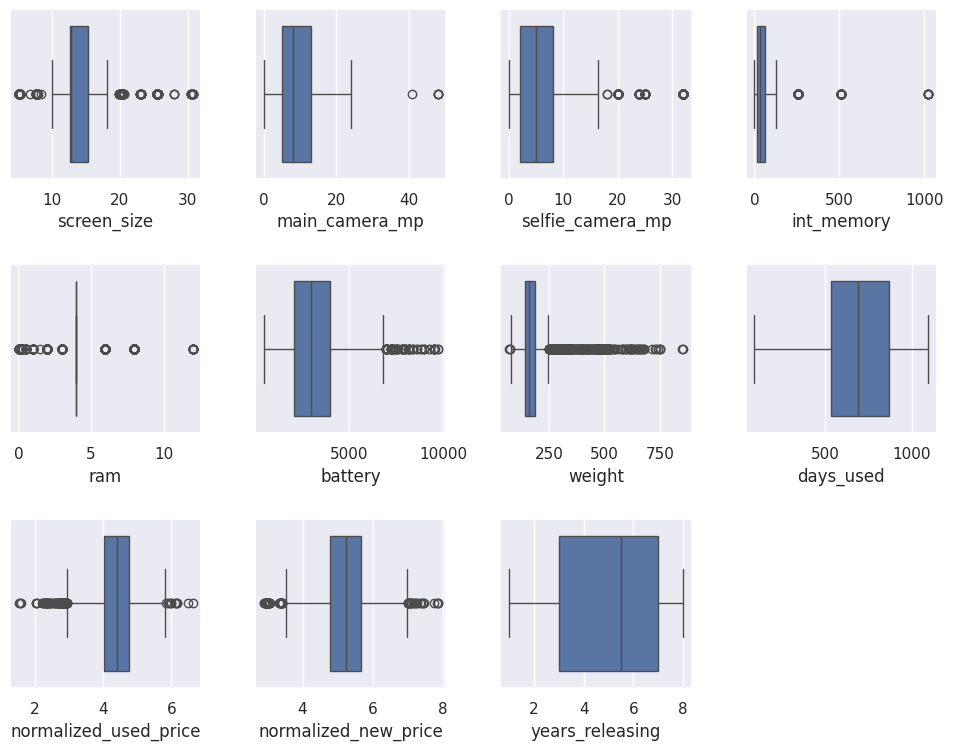

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for Modeling

- We'll split the data into train and test to be able to evaluate the model that we build on the train data.
- We'll have to encode categorical features.
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
# defining X and y variables
x = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(x.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_releasing  
0              4.715100                1  
1              5.519018                1  
2              5.884631                1  
3              5.630961           

In [ ]:
# let's add the intercept to data
x = sm.add_constant(x)
x.head()

,const,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_releasing
0,1.0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,1.0,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,1.0,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,1.0,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,1.0,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [ ]:
# creating dummy variables
x = pd.get_dummies(x,columns = x.select_dtypes(include = ['object','category']).columns.tolist(),
                   drop_first = True
                   )
x.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train,x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                           20:44:42   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Interpretation of R-squared**
The R-squared value tells us that our model can explain 84.5% of the variance in the training set.

1. **Adjusted. R-squared**: The value for adj. R-squared is 84.2%, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is 1.3866


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
   

### Model Performance Check

Check the performance of the model using different metrics:

We will be using metric functions defined in sklearn for RMSE, MAE, and  R2 .

We will define a function to calculate MAPE and adjusted  R2 .

We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalized used price within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalize used price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

### TEST FOR MULTICOLLINEARITY

We define a function to check VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


**Observations:**
- There are multiple columns with very high VIF values, indicating presence of strong multicollinearity (screen_size, weight)
- We will systematically drop numerical columns with VIF > 5
- We will ignore the VIF values for dummy variables (brand_name_Apple, brand_name_Huawei, brand_name_Others, brand_name_Samsung, os_iOS)and the constant (intercept)

**To remove multicollinearity**

- Drop every column one by one that has a VIF score greater than 5.
- Look at the adjusted R-squared and RMSE of all these models.
- Drop the variable that makes the least change in adjusted R-squared.
- Check the VIF scores again.
- Continue till you get all VIF scores under 5

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [ ]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_releasing,4.730315


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                           20:44:44   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

### Dealing with high p-value variables

- As observed in the above model, 'int_memory', 'battery', and 'days_used' has a p-value greater than 0.05. So, we can drop it because it is not significant in predicting 'normalized_use_price'.

- Since all the dummy variables of the categorical column 'brand_name' have a p-value > 0.05, then the categorical column is insignificant, and all the dummy variables can be dropped at once.

-  Sometimes p-values change after dropping a variable. So, we'll not drop all variables at once

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_releasing', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                           20:44:44   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**
* After dropping the features causing strong multicollinearity and the statistically insignificant ones (p-value greater than 0.05), we'll consider *olsmod2* as the final model.

* our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.842 to 0.838). This shows that the variables we dropped did not have much predictive power.

* adjusted R-squared is 0.842, i.e., our model is able to explain ~84% of the variance

* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


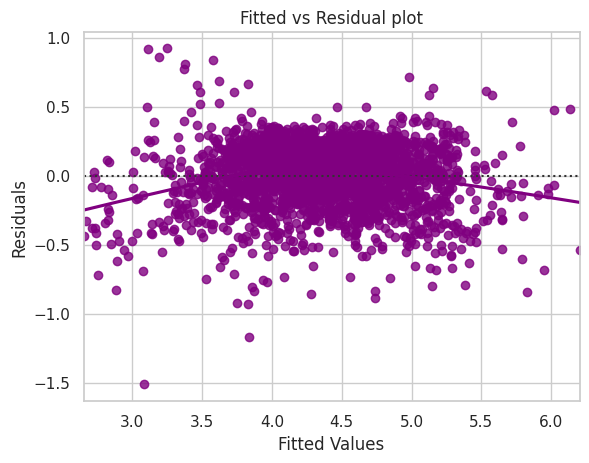

In [ ]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

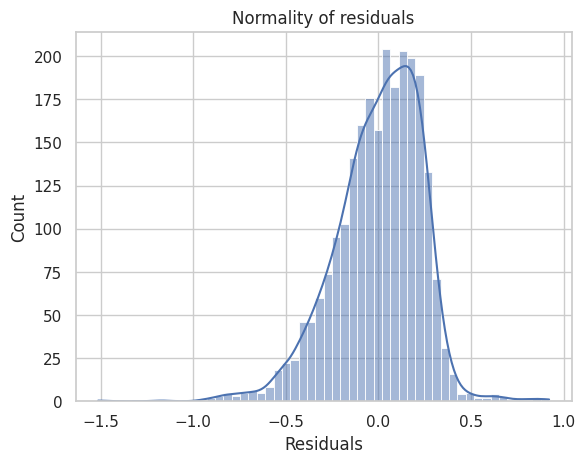

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observation:**
- The histogram of the residual does not have a bell-shaped. it is slightly skewed to the left.

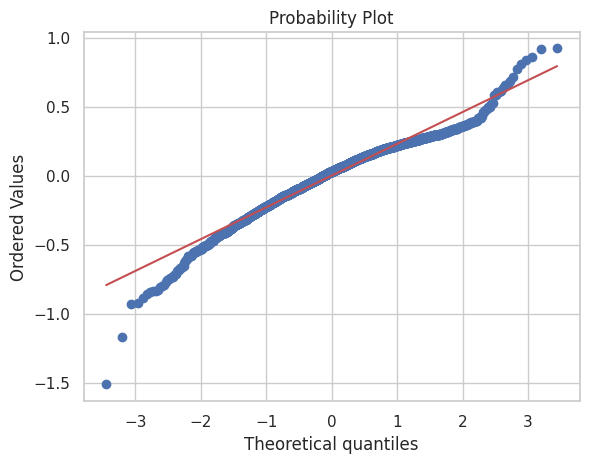

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observation:**
- By checking the Q-Q plot of residuals, If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
it is obvious that the residual does not follow normal distribution.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

**Observation:**

By checking the Shapiro-Wilk test:

    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

- Since p-value < 0.05, the residuals are not normal
Strictly speaking, the residuals are not normal.
- When the sample size is sufficiently large, the Central Limit Theorem ensures that the distribution of residuals will approximate normality.

### TEST FOR HOMOSCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

**Observation:**
- By checking the goldfeldquandt test:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity
    
- Since p-value > 0.05, the residuals are homoscedastic.

## Predictions on test data

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


**Observation:**
- We can notice that the model has returned good prediction results, and the actual and predicted values are comparable

## Final Model

Let's print the linear regression equation.

In [ ]:
 # Let us write the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(olsmod2.params[i], "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            olsmod2.params[i],
            "* (",
            x_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmod2.params[i], "* (", x_train3.columns[i], ")")

normalized_used_price = 1.4999812451972678 + 0.020967228790752777 * ( main_camera_mp ) +  0.013827288876828842 * ( selfie_camera_mp ) +  0.02071270165714738 * ( ram ) +  0.0016616476692227972 * ( weight ) +  0.4414723002236377 * ( normalized_new_price ) +  -0.02916976367153913 * ( years_releasing ) +  0.11559844506476558 * ( brand_name_Karbonn ) +  -0.03742329934072872 * ( brand_name_Samsung ) +  -0.06699285130111633 * ( brand_name_Sony ) +  0.08006840695804293 * ( brand_name_Xiaomi ) +  -0.1275751256189785 * ( os_Others ) +  -0.09000552317649085 * ( os_iOS ) +  0.050213451529782495 * ( 4g_yes ) +  -0.06725868426972234 * ( 5g_yes )


In [ ]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                           20:44:46   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train3, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test3, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations:**

The model is able to explain ~84% of the variation in the data

The train and test RMSE and MAE are comparable. So, our model is not suffering from overfitting

The MAPE on the test set suggests we can predict within 4.56% of the normalized used price.

Hence, we can conclude the model is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

- The model is able to explain ~84% of the variation in the data and
within 4.56% of the normalized used price on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes


- If the resolution of the main camera increases by one megapixels, then the device normalized use price increase by 0.021 euro, all other variables held constant


- If the resolution of the selfie camera increases by one megapixels, then the device normalized use price increase by 0.014 euro, all other variables held constant


- If the ram is increases by one GB, then the device normalized use price increase by 0.021 euro, all other variables held constant


- If the weight is increases by one gram, then the device normalized use price increase by 0.002 euro, all other variables held constant

- If the normalized new price is increases by one euro, then the device normalized use price increase by 0.441 euro, all other variables held constant


- If the released year is increases by one year, then the device normalized use price decreases by 0.029 euro, all other variables held constant


- The normalize used price for 'brand_name_Karbonn' will be 0.116 units greater than 'brand_name_Acer'


- The normalize used price for 'brand_name_Samsung' will be 0.037 units less than 'brand_name_Acer'

- The normalize used price for 'brand_name_Sony' will be -0.067 units less than 'brand_name_Acer'

- The normalize used price for 'brand_name_Xiaomi' will be 0.08
units greater than 'brand_name_Acer'

- The normalize used price for 'os_Others' will be 0.128 units less than 'os_Android'

- The normalize used price for 'os_ios' will be 0.128 units less than 'os_Android'

- The normalize used price for '4g' will be 0.05 units more than with no "4g'

- The normalize used price for '5g' will be 0.007 units less than with no "5g'


___